In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI ML/Events/Zentrix/UIDAI Datasets/api_data_aadhar_enrolment.csv")
df.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

df.fillna(0, inplace=True)

df['state'] = df['state'].str.strip().str.title()
df['district'] = df['district'].str.strip().str.title()

df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21


In [ ]:
df['total_activity'] = (
    df['age_0_5'] + df['age_5_17'] + df['age_18_greater']
)
df['child_ratio'] = df['age_0_5'] / df['total_activity']
df['youth_ratio'] = df['age_5_17'] / df['total_activity']
df['adult_ratio'] = df['age_18_greater'] / df['total_activity']

df.replace([np.inf, -np.inf], 0, inplace=True)

df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_activity,child_ratio,youth_ratio,adult_ratio
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,109,0.100917,0.559633,0.339450
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,86,0.162791,0.383721,0.453488
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123,0.235772,0.666667,0.097561
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,106,0.584906,0.273585,0.141509
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,51,0.274510,0.313725,0.411765


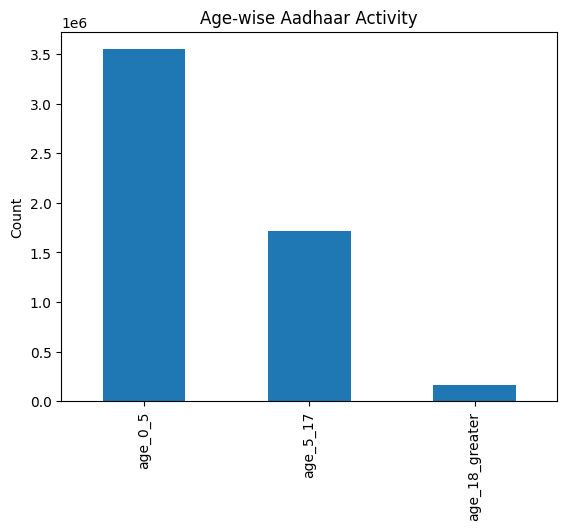

In [ ]:
age_summary = df[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

age_summary.plot(kind='bar', title='Age-wise Aadhaar Activity')
plt.ylabel("Count")
plt.show()


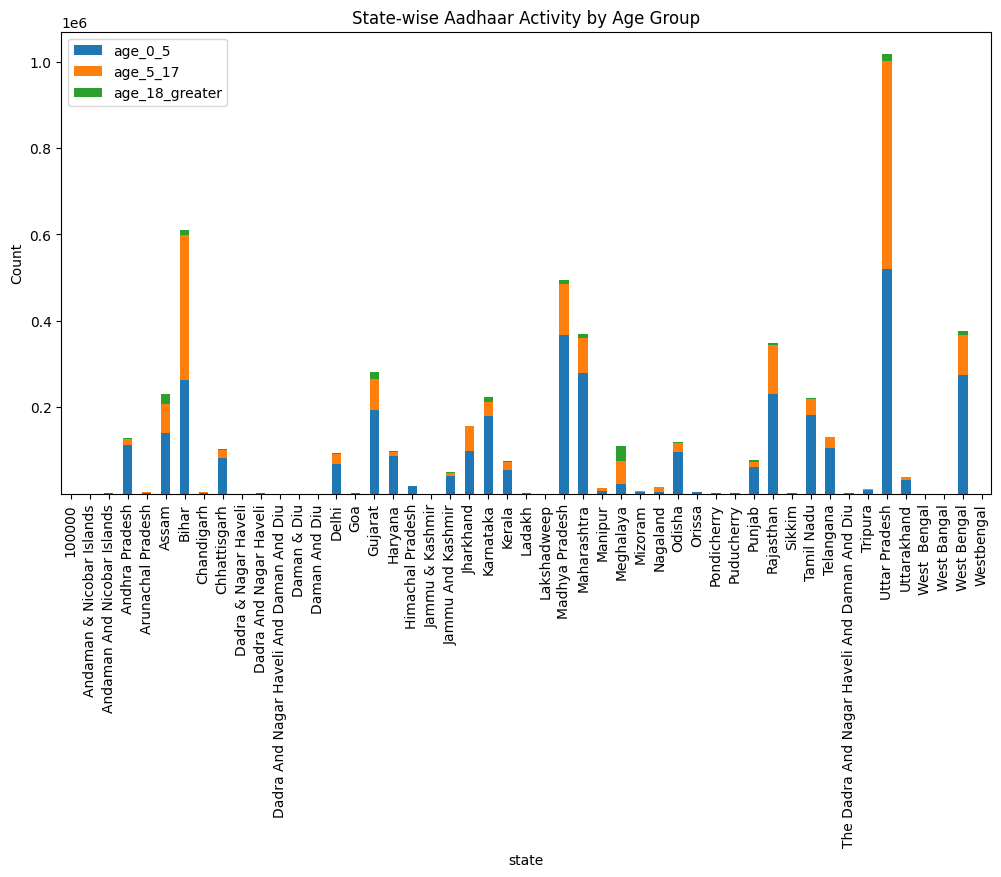

In [ ]:
state_age = df.groupby('state')[['age_0_5','age_5_17','age_18_greater']].sum()

state_age.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("State-wise Aadhaar Activity by Age Group")
plt.ylabel("Count")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
daily_load = (
    df.groupby('date')['total_activity']
    .sum()
    .reset_index()
)

daily_load.set_index('date', inplace=True)

daily_load.head()


,total_activity
date,
2025-03-02,109
2025-03-09,3404
2025-03-15,3102
2025-03-20,6218
2025-03-23,576


In [ ]:
train_size = int(len(daily_load) * 0.85)

train = daily_load.iloc[:train_size]
test = daily_load.iloc[train_size:]

model = ARIMA(train['total_activity'], order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         total_activity   No. Observations:                   78
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -974.523
Date:                Tue, 20 Jan 2026   AIC                           1955.046
Time:                        14:39:17   BIC                           1962.077
Sample:                             0   HQIC                          1957.858
                                 - 78                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3775      0.046      8.224      0.000       0.287       0.467
ma.L1         -0.9834      0.070    -14.113      0.000      -1.120      -0.847
sigma2      6.638e+09   1.23e-11   5.38e+20      0.0

In [ ]:
!pip install -q streamlit pandas plotly folium streamlit-folium
!npm install -g localtunnel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 523.7/523.7 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.1 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴
added 22 packages in 3s
⠴
⠴3 packages are looking for funding
⠴  run `npm fund` for details
⠴

In [ ]:
import pandas as pd
import numpy as np

# ==========================================
# 1. LOAD YOUR DATA
# ==========================================
print("⏳ Loading datasets...")

try:
    # Read directly from your Drive paths
    df_enrollment = pd.read_csv("/content/drive/MyDrive/AI ML/Events/Zentrix/UIDAI Datasets/api_data_aadhar_enrolment.csv")
    df_demographic = pd.read_csv("/content/drive/MyDrive/AI ML/Events/Zentrix/UIDAI Datasets/api_data_aadhar_demographic_1500000_2000000.csv")
    print("✅ Files loaded successfully.")

except FileNotFoundError:
    print("⚠️ Files not found! Using Dummy Data for demonstration.")
    # Dummy data block for backup
    df_enrollment = pd.DataFrame({
        'State': ['Delhi']*10, 'District': ['New Delhi']*10,
        'Age Group': [20]*10, 'Gender':['M']*10,
        'Mobile Number': [1]*10, 'Enrolment Rejected':[0]*10
    })
    df_demographic = pd.DataFrame({
        'State Name': ['Delhi']*10, 'District Name': ['New Delhi']*10,
        'Update_Type': ['Address']*10, 'Count': [100]*10
    })

# ==========================================
# 2. INTELLIGENT COLUMN RENAMING
# ==========================================
def smart_rename(df):
    # Strip whitespace from all columns first
    df.columns = [c.strip() for c in df.columns]

    # Common UIDAI Column Mappings
    rename_map = {
        'State/UT': 'State',
        'State Name': 'State',
        'Lev_1': 'State',
        'District Name': 'District',
        'Lev_2': 'District',
        'Age Group': 'Age',
        'Gender': 'Gender',
        'Sex': 'Gender',
        'Mobile Number': 'Mobile_Provided',
        'Mobile': 'Mobile_Provided',
        'Enrolment Rejected': 'Rejected'
    }

    # Rename if matches found
    df = df.rename(columns=rename_map)
    return df

print("\n--- DIAGNOSTICS ---")
print(f"Original Enrollment Cols: {list(df_enrollment.columns)}")
df_enrollment = smart_rename(df_enrollment)
print(f"Fixed Enrollment Cols:    {list(df_enrollment.columns)}")

print(f"Original Demographic Cols: {list(df_demographic.columns)}")
df_demographic = smart_rename(df_demographic)
print(f"Fixed Demographic Cols:    {list(df_demographic.columns)}")

# ==========================================
# 3. VERIFY CRITICAL COLUMNS EXIST
# ==========================================
# We check if 'State' OR 'District' exists (sometimes district is named differently)
required_cols = ['state', 'district']
missing = [c for c in required_cols if c not in df_enrollment.columns]

if missing:
    print(f"\n❌ CRITICAL ERROR: Columns {missing} still missing in Enrollment data.")
    print("👉 Check the 'Original Enrollment Cols' printed above and update the 'rename_map' dictionary.")
else:
    # Save Processed Files for the Dashboard
    df_enrollment.to_csv("processed_enrollment.csv", index=False)
    df_demographic.to_csv("processed_demographic.csv", index=False)
    print("\n✅ Success! 'processed_enrollment.csv' and 'processed_demographic.csv' saved.")
    print("👉 You can now run Cell 3 (App) and Cell 4 (ngrok).")

⏳ Loading datasets...
✅ Files loaded successfully.

--- DIAGNOSTICS ---
Original Enrollment Cols: ['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater']
Fixed Enrollment Cols:    ['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater']
Original Demographic Cols: ['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_']
Fixed Demographic Cols:    ['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_']

✅ Success! 'processed_enrollment.csv' and 'processed_demographic.csv' saved.
👉 You can now run Cell 3 (App) and Cell 4 (ngrok).


# ***Analysis 1***

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px

# --- PAGE SETUP ---
st.set_page_config(page_title="UIDAI Insight 2026", layout="wide")

st.markdown("""
<style>
    .main-metric {font-size: 24px; font-weight: bold; color: #2E86C1;}
    .sub-metric {font-size: 14px; color: #555;}
</style>
""", unsafe_allow_html=True)

st.title("🇮🇳 UIDAI Strategic Insight Dashboard")
st.markdown("### 🎯 Theme: Societal Trends & System Optimization")

# --- LOAD DATA ---
@st.cache_data
def load_data():
    try:
        # Load the files created in the previous step
        df_enr = pd.read_csv("processed_enrollment.csv")
        df_demo = pd.read_csv("processed_demographic.csv")
        return df_enr, df_demo
    except Exception as e:
        return None, None

df_enr, df_demo = load_data()

if df_enr is None:
    st.error("⚠️ Data files not found. Please run the 'Data Processing' cell again.")
    st.stop()

# --- STANDARDIZE COLUMNS FOR LOGIC ---
# This ensures the code works even if columns are lowercase
df_enr.columns = [c.lower() for c in df_enr.columns]
df_demo.columns = [c.lower() for c in df_demo.columns]

# --- SIDEBAR FILTER ---
st.sidebar.header("📍 Region Filter")
# Using 'state' (lowercase) because that's what your data has
all_states = sorted(list(df_enr['state'].unique()))
selected_state = st.sidebar.selectbox("Select State", ["All"] + all_states)

if selected_state != "All":
    df_enr = df_enr[df_enr['state'] == selected_state]
    df_demo = df_demo[df_demo['state'] == selected_state]

# --- TABS FOR INSIGHTS ---
tab1, tab2, tab3, tab4 = st.tabs([
    "👶 Child Enrollment Trends",
    "📈 Update Traffic Analysis",
    "🔮 Future Demand Forecast",
    "🗺️ Regional Hotspots"
])

# --- INSIGHT 1: CHILD ENROLLMENT (Societal Trend) ---
with tab1:
    st.header("1. The 'Young India' Index")
    st.markdown("**Insight:** Identify districts with the highest surge in new child enrollments (Age 0-5).")

    if 'age_0_5' in df_enr.columns:
        # Group by District to get total counts
        child_stats = df_enr.groupby('district')[['age_0_5', 'age_18_greater']].sum().reset_index()

        # Calculate 'Child Ratio' (Proxy for birth rate/new saturation)
        child_stats['Total'] = child_stats['age_0_5'] + child_stats['age_18_greater']
        child_stats['Child_Share_Pct'] = (child_stats['age_0_5'] / child_stats['Total']) * 100

        top_child_dists = child_stats.sort_values('Child_Share_Pct', ascending=False).head(10)

        c1, c2 = st.columns([2, 1])
        with c1:
            fig1 = px.bar(top_child_dists, x='district', y='Child_Share_Pct',
                         title="Districts with Highest Proportion of Child Enrollments (0-5)",
                         color='Child_Share_Pct', color_continuous_scale='Mint',
                         labels={'Child_Share_Pct': 'Child Share (%)'})
            st.plotly_chart(fig1, use_container_width=True)
        with c2:
            st.info("💡 **Why it matters:** High child enrollment percentages indicate either high birth rates or successful saturation drives for newborns in these districts.")
            st.dataframe(top_child_dists[['district', 'age_0_5']].head(5))

# --- INSIGHT 2: UPDATE TRAFFIC (System Improvement) ---
with tab2:
    st.header("2. Demographic Update Traffic")
    st.markdown("**Insight:** Which age groups are driving the load on update centers?")

    # Check if we have demographic data columns
    cols_to_sum = [c for c in ['demo_age_5_17', 'demo_age_17_'] if c in df_demo.columns]

    if cols_to_sum:
        update_totals = df_demo[cols_to_sum].sum().reset_index()
        update_totals.columns = ['Age_Group', 'Count']

        # Rename for clarity
        update_totals['Age_Group'] = update_totals['Age_Group'].replace({
            'demo_age_5_17': 'School Age (5-17)',
            'demo_age_17_': 'Adults (18+)'
        })

        fig2 = px.pie(update_totals, names='Age_Group', values='Count',
                      title="Share of Demographic Updates by Age Group",
                      color_discrete_sequence=px.colors.sequential.RdBu)
        st.plotly_chart(fig2, use_container_width=True)

        st.markdown("""
        **System Recommendation:**
        * If **School Age** updates are high: Deploy camps in schools.
        * If **Adult** updates are high: Increase counters at banks/post offices.
        """)

# --- INSIGHT 3: FORECAST (Predictive) ---
with tab3:
    st.header("3. Mandatory Biometric Update Forecast")
    st.markdown("**Insight:** Predicting the load for mandatory biometric updates based on the 5-17 age bucket.")

    if 'age_5_17' in df_enr.columns:
        # We assume ~20% of the 5-17 bucket turns 15 (mandatory update age) each year
        forecast_df = df_enr.groupby('district')['age_5_17'].sum().reset_index()
        forecast_df['Projected_Load'] = (forecast_df['age_5_17'] / 10).astype(int) # Estimate

        top_load = forecast_df.sort_values('Projected_Load', ascending=False).head(10)

        st.success(f"📈 **Forecast:** Approx. {forecast_df['Projected_Load'].sum():,} mandatory updates expected in this region soon.")

        fig3 = px.bar(top_load, x='district', y='Projected_Load',
                      title="Projected Workload for Mandatory Biometric Updates (Top 10 Districts)",
                      color='Projected_Load', color_continuous_scale='Oranges')
        st.plotly_chart(fig3, use_container_width=True)

# --- INSIGHT 4: REGIONAL HOTSPOTS (Geospatial Proxy) ---
with tab4:
    st.header("4. Regional Activity Hotspots")
    st.markdown("**Insight:** Heatmap of total activity (Enrollment + Updates).")

    # Merge district level counts from both files
    enr_agg = df_enr.groupby('district')[['age_0_5', 'age_5_17', 'age_18_greater']].sum().sum(axis=1).reset_index(name='Enrollment_Activity')
    demo_agg = df_demo.groupby('district')[cols_to_sum].sum().sum(axis=1).reset_index(name='Update_Activity')

    merged = pd.merge(enr_agg, demo_agg, on='district', how='outer').fillna(0)
    merged['Total_Activity'] = merged['Enrollment_Activity'] + merged['Update_Activity']

    fig4 = px.treemap(merged, path=['district'], values='Total_Activity',
                      title="Total Aadhaar Activity Intensity by District",
                      color='Update_Activity', color_continuous_scale='Viridis',
                      hover_data=['Enrollment_Activity', 'Update_Activity'])
    st.plotly_chart(fig4, use_container_width=True)

Overwriting app.py


In [ ]:
import os
import time
import subprocess

# 1. Check if Data Exists (Safety Check)
if not os.path.exists('processed_enrollment.csv'):
    print("❌ ERROR: 'processed_enrollment.csv' not found!")
    print("👉 SOLUTION: Go back and run Cell 2 again to generate the data files.")
else:
    print("✅ Data files found. Preparing launch sequence...")

    # 2. Install Dependencies (Streamlit + Tunneling)
    print("🛠️ Installing Streamlit & LocalTunnel... (Please wait)")
    !pip install -q streamlit plotly pandas
    !npm install -g localtunnel > /dev/null 2>&1  # Silencing output to keep clean

    # 3. Kill any previous instances to prevent conflicts
    print("🔄 Clearing old processes...")
    !pkill -f streamlit

    # 4. Start Streamlit Server in Background
    print("🚀 Starting Streamlit Server...")
    # We redirect output to /dev/null so it doesn't clutter the cell
    get_ipython().system_raw('streamlit run app.py &>/dev/null &')

    # 5. Get Public IP (Required for LocalTunnel Password)
    print("\n👇 COPY THIS IP ADDRESS (You need this for the password) 👇")
    print("--------------------------------------------------")
    !wget -q -O - ipv4.icanhazip.com
    print("--------------------------------------------------")
    print("👆 COPY THIS IP ADDRESS 👆")

    # 6. Create the Tunnel
    print("\n⏳ Initializing Tunnel... (Wait 5 seconds)")
    time.sleep(5) # Give Streamlit time to boot up

    print("🔗 CLICK THE LINK BELOW AND PASTE THE IP ADDRESS ABOVE:")
    !npx localtunnel --port 8501

✅ Data files found. Preparing launch sequence...
🛠️ Installing Streamlit & LocalTunnel... (Please wait)
🔄 Clearing old processes...
🚀 Starting Streamlit Server...

👇 COPY THIS IP ADDRESS (You need this for the password) 👇
--------------------------------------------------
34.6.212.163
--------------------------------------------------
👆 COPY THIS IP ADDRESS 👆

⏳ Initializing Tunnel... (Wait 5 seconds)
🔗 CLICK THE LINK BELOW AND PASTE THE IP ADDRESS ABOVE:
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦your url is: https://two-banks-repeat.loca.lt
^C


# ***Analysis 2***

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# --- PAGE CONFIGURATION ---
st.set_page_config(page_title="UIDAI Insight Dashboard 2026", layout="wide")

# Custom CSS for metrics
st.markdown("""
<style>
    .metric-card {
        background-color: #f0f2f6;
        padding: 20px;
        border-radius: 10px;
        text-align: center;
    }
    .metric-value { font-size: 28px; font-weight: bold; color: #0068c9; }
    .metric-label { font-size: 14px; color: #555; }
</style>
""", unsafe_allow_html=True)

st.title("🇮🇳 UIDAI Strategic Insight Dashboard")
st.markdown("### 🎯 Theme: Comparative Analysis of Enrollment vs. Demographic Updates")

# --- LOAD DATA ---
@st.cache_data
def load_and_prep_data():
    try:
        # Load processed files
        df_enr = pd.read_csv("processed_enrollment.csv")
        df_demo = pd.read_csv("processed_demographic.csv")

        # Standardize columns to lowercase for safety
        df_enr.columns = [c.lower() for c in df_enr.columns]
        df_demo.columns = [c.lower() for c in df_demo.columns]

        return df_enr, df_demo
    except Exception as e:
        return None, None

df_enr, df_demo = load_and_prep_data()

if df_enr is None or df_demo is None:
    st.error("❌ Data files missing! Please run Cell 2 (Data Processing) first.")
    st.stop()

# --- SIDEBAR FILTER ---
st.sidebar.header("📍 Region Filter")
# Get states present in both datasets
common_states = sorted(list(set(df_enr['state'].unique()) & set(df_demo['state'].unique())))
selected_state = st.sidebar.selectbox("Select State", ["All"] + common_states)

if selected_state != "All":
    df_enr = df_enr[df_enr['state'] == selected_state]
    df_demo = df_demo[df_demo['state'] == selected_state]

# --- KEY METRICS (HEADER) ---
c1, c2, c3, c4 = st.columns(4)
total_enr = df_enr[['age_0_5', 'age_5_17', 'age_18_greater']].sum().sum()
total_upd = df_demo[['demo_age_5_17', 'demo_age_17_']].sum().sum()

# Ratio of Updates to Enrollments (High ratio = Mature market)
maturity_index = (total_upd / total_enr) if total_enr > 0 else 0

c1.metric("Total New Enrollments", f"{total_enr:,}")
c2.metric("Total Demographic Updates", f"{total_upd:,}")
c3.metric("System Load (Transactions)", f"{total_enr + total_upd:,}")
c4.metric("Maturity Index (Updates/New)", f"{maturity_index:.2f}")

# --- TABS ---
tab1, tab2, tab3 = st.tabs([
    "📊 Demographic Update Trends",
    "⚖️ Enrollment vs. Updates",
    "🏫 Student & Adult Analysis"
])

# =========================================================
# INSIGHT 1: DEEP DIVE INTO DEMOGRAPHIC DATASET
# =========================================================
with tab1:
    st.header("1. Demographic Update Analysis")
    st.write("Analyzing the `demo_age_5_17` and `demo_age_17_` columns to understand why people are visiting centers.")

    # 1. Aggregate Demographic Data by District
    demo_agg = df_demo.groupby('district')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()
    demo_agg['Total_Updates'] = demo_agg['demo_age_5_17'] + demo_agg['demo_age_17_']

    col_a, col_b = st.columns([2, 1])

    with col_a:
        # Sort by Total Updates to find high-traffic districts
        top_update_dists = demo_agg.sort_values('Total_Updates', ascending=False).head(10)

        fig_updates = px.bar(top_update_dists, x='district', y=['demo_age_5_17', 'demo_age_17_'],
                             title="Top 10 Districts by Update Volume (Split by Age)",
                             labels={'value': 'Number of Updates', 'variable': 'Age Category'},
                             barmode='stack',
                             color_discrete_map={'demo_age_5_17': '#FFA07A', 'demo_age_17_': '#20B2AA'})
        # Rename legend
        new_names = {'demo_age_5_17': 'School Age (5-17)', 'demo_age_17_': 'Adults (18+)'}
        fig_updates.for_each_trace(lambda t: t.update(name = new_names[t.name]))

        st.plotly_chart(fig_updates, use_container_width=True)

    with col_b:
        st.info("💡 **Insight:**")
        st.markdown("""
        * **Orange Blocks (5-17):** These are likely **Mandatory Biometric Updates (MBU)** required for exams/scholarships.
        * **Green Blocks (18+):** These are adults updating Address/Mobile, likely due to **Migration or Banking needs**.
        """)

        # Calculate % share of Adult updates
        total_adult = demo_agg['demo_age_17_'].sum()
        total_school = demo_agg['demo_age_5_17'].sum()

        fig_pie = px.pie(names=['Adults (Migration/Banking)', 'Students (MBU)'],
                         values=[total_adult, total_school],
                         title="Purpose of Updates (Inferred)",
                         color_discrete_sequence=['#20B2AA', '#FFA07A'])
        st.plotly_chart(fig_pie, use_container_width=True)

# =========================================================
# INSIGHT 2: ENROLLMENT VS UPDATE (COMPARATIVE)
# =========================================================
with tab2:
    st.header("2. Market Maturity: Growth vs. Maintenance")
    st.write("Comparing `Enrollment` (New Users) vs `Demographic` (Existing Users) to classify districts.")

    # Merge datasets on District
    enr_stats = df_enr.groupby('district')[['age_0_5', 'age_5_17', 'age_18_greater']].sum().sum(axis=1).reset_index(name='New_Enrollments')
    demo_stats = df_demo.groupby('district')[['demo_age_5_17', 'demo_age_17_']].sum().sum(axis=1).reset_index(name='Updates')

    merged = pd.merge(enr_stats, demo_stats, on='district', how='inner')

    # Calculate Ratio
    # If Updates >> Enrollments -> "Mature District"
    # If Enrollments >> Updates -> "Emerging District"

    fig_scatter = px.scatter(merged, x='New_Enrollments', y='Updates',
                             hover_name='district', size='Updates',
                             color='Updates',
                             title="District Classification: New Enrollments vs. Updates",
                             labels={'New_Enrollments': 'New Aadhaar Gen (Growth)', 'Updates': 'Corrections (Maturity)'},
                             color_continuous_scale='Viridis')

    # Add a diagonal line (x=y) to show the balance
    max_val = max(merged['New_Enrollments'].max(), merged['Updates'].max())
    fig_scatter.add_shape(type="line", x0=0, y0=0, x1=max_val, y1=max_val,
                          line=dict(color="Red", width=1, dash="dash"))

    st.plotly_chart(fig_scatter, use_container_width=True)
    st.caption("🔴 Districts ABOVE the red dashed line have more Updates than New Enrollments (High Maintenance Load).")

# =========================================================
# INSIGHT 3: SPECIFIC TARGETING
# =========================================================
with tab3:
    st.header("3. Targeted Intervention Lists")

    c1, c2 = st.columns(2)

    with c1:
        st.subheader("🏫 Districts Needing School Camps")
        st.write("Based on high `demo_age_5_17` volume.")
        # Top 5 districts for 5-17 updates
        school_target = df_demo.groupby('district')['demo_age_5_17'].sum().sort_values(ascending=False).head(5)
        st.dataframe(school_target, width=500)

    with c2:
        st.subheader("🏙️ Migration Hubs (Adult Updates)")
        st.write("Based on high `demo_age_17_` volume.")
        # Top 5 districts for 18+ updates
        adult_target = df_demo.groupby('district')['demo_age_17_'].sum().sort_values(ascending=False).head(5)
        st.dataframe(adult_target, width=500)

Overwriting app.py


In [ ]:
import os
import time
import subprocess

# 1. Check if Data Exists (Safety Check)
if not os.path.exists('processed_enrollment.csv'):
    print("❌ ERROR: 'processed_enrollment.csv' not found!")
    print("👉 SOLUTION: Go back and run Cell 2 again to generate the data files.")
else:
    print("✅ Data files found. Preparing launch sequence...")

    # 2. Install Dependencies (Streamlit + Tunneling)
    print("🛠️ Installing Streamlit & LocalTunnel... (Please wait)")
    !pip install -q streamlit plotly pandas
    !npm install -g localtunnel > /dev/null 2>&1  # Silencing output to keep clean

    # 3. Kill any previous instances to prevent conflicts
    print("🔄 Clearing old processes...")
    !pkill -f streamlit

    # 4. Start Streamlit Server in Background
    print("🚀 Starting Streamlit Server...")
    # We redirect output to /dev/null so it doesn't clutter the cell
    get_ipython().system_raw('streamlit run app.py &>/dev/null &')

    # 5. Get Public IP (Required for LocalTunnel Password)
    print("\n👇 COPY THIS IP ADDRESS (You need this for the password) 👇")
    print("--------------------------------------------------")
    !wget -q -O - ipv4.icanhazip.com
    print("--------------------------------------------------")
    print("👆 COPY THIS IP ADDRESS 👆")

    # 6. Create the Tunnel
    print("\n⏳ Initializing Tunnel... (Wait 5 seconds)")
    time.sleep(5) # Give Streamlit time to boot up

    print("🔗 CLICK THE LINK BELOW AND PASTE THE IP ADDRESS ABOVE:")
    !npx localtunnel --port 8501

✅ Data files found. Preparing launch sequence...
🛠️ Installing Streamlit & LocalTunnel... (Please wait)
🔄 Clearing old processes...
🚀 Starting Streamlit Server...

👇 COPY THIS IP ADDRESS (You need this for the password) 👇
--------------------------------------------------
34.6.212.163
--------------------------------------------------
👆 COPY THIS IP ADDRESS 👆

⏳ Initializing Tunnel... (Wait 5 seconds)
🔗 CLICK THE LINK BELOW AND PASTE THE IP ADDRESS ABOVE:
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹your url is: https://silver-mangos-fall.loca.lt
^C


# ***Analysis 3***

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px

# --- PAGE CONFIGURATION ---
st.set_page_config(page_title="UIDAI Insight Dashboard 2026", layout="wide")

# Custom CSS
st.markdown("""
<style>
    .metric-card { background-color: #f0f2f6; padding: 20px; border-radius: 10px; text-align: center; }
    div[data-testid="stMetricValue"] { font-size: 24px; color: #0068c9; }
</style>
""", unsafe_allow_html=True)

st.title("🇮🇳 UIDAI Strategic Insight Dashboard")
st.markdown("### 🎯 Theme: Societal Trends & System Optimization")

# --- LOAD DATA ---
@st.cache_data
def load_and_prep_data():
    try:
        df_enr = pd.read_csv("processed_enrollment.csv")
        df_demo = pd.read_csv("processed_demographic.csv")

        # Standardize columns to lowercase
        df_enr.columns = [c.lower() for c in df_enr.columns]
        df_demo.columns = [c.lower() for c in df_demo.columns]

        return df_enr, df_demo
    except Exception as e:
        return None, None

df_enr, df_demo = load_and_prep_data()

if df_enr is None or df_demo is None:
    st.error("❌ Data files missing! Please run Cell 2 first.")
    st.stop()

# --- 📍 SIDEBAR REGION FILTER (FIXED) ---
st.sidebar.title("📍 Filters")

# Get list of states
states_enr = set(df_enr['state'].dropna().unique())
states_demo = set(df_demo['state'].dropna().unique())
common_states = sorted(list(states_enr | states_demo)) # Combine both

selected_state = st.sidebar.selectbox("Select Region/State", ["All India"] + common_states)

# Apply Filter
if selected_state != "All India":
    df_enr = df_enr[df_enr['state'] == selected_state]
    df_demo = df_demo[df_demo['state'] == selected_state]
    st.sidebar.success(f"Showing data for: {selected_state}")
else:
    st.sidebar.info("Showing data for All India")

# --- GLOBAL METRICS ---
total_enr = df_enr[['age_0_5', 'age_5_17', 'age_18_greater']].sum().sum()
total_upd = df_demo[['demo_age_5_17', 'demo_age_17_']].sum().sum()

c1, c2, c3 = st.columns(3)
c1.metric("Total New Enrollments", f"{total_enr:,}", delta="Growth")
c2.metric("Total Updates", f"{total_upd:,}", delta="Maintenance")
c3.metric("Total Traffic", f"{total_enr + total_upd:,}")

st.divider()

# --- TABS ---
tab1, tab2, tab3, tab4, tab5 = st.tabs([
    "👶 Child Enrollment (Enhanced)",
    "⚖️ Enrolment vs Updates (New Chart)",
    "📊 Demographic Trends",
    "🏫 Student & Adult Analysis",
    "🔮 Future Demand"
])

# =========================================================
# TAB 1: CHILD ENROLLMENT (ENHANCED)
# =========================================================
with tab1:
    st.subheader("👶 The 'Young India' Index: Child Enrollment Analysis")

    # Metrics specific to this tab
    child_count = df_enr['age_0_5'].sum()
    child_share = (child_count / total_enr * 100) if total_enr > 0 else 0

    m1, m2 = st.columns(2)
    m1.metric("Total Children (0-5) Enrolled", f"{child_count:,}")
    m2.metric("Child Share of Total Enrollment", f"{child_share:.1f}%")

    col_left, col_right = st.columns([1, 1])

    with col_left:
        st.markdown("##### 1. Age Composition (Pie Chart)")
        # Aggregate totals for pie chart
        age_sums = df_enr[['age_0_5', 'age_5_17', 'age_18_greater']].sum().reset_index()
        age_sums.columns = ['Age_Group', 'Count']
        age_sums['Age_Group'] = age_sums['Age_Group'].replace({
            'age_0_5': 'Infants (0-5)',
            'age_5_17': 'School Age (5-17)',
            'age_18_greater': 'Adults (18+)'
        })

        fig_pie = px.pie(age_sums, values='Count', names='Age_Group',
                         title="Share of Enrollments by Age Category",
                         color_discrete_sequence=px.colors.sequential.Mint)
        st.plotly_chart(fig_pie, use_container_width=True)

    with col_right:
        st.markdown("##### 2. Top Districts for Child Enrollment")
        # District-wise analysis
        child_dist = df_enr.groupby('district')['age_0_5'].sum().reset_index()
        top_child_dist = child_dist.sort_values('age_0_5', ascending=False).head(10)

        fig_bar = px.bar(top_child_dist, x='district', y='age_0_5',
                         title="Districts with Highest Child Intake",
                         color='age_0_5', color_continuous_scale='Teal',
                         labels={'age_0_5': 'Children Enrolled'})
        st.plotly_chart(fig_bar, use_container_width=True)

# =========================================================
# TAB 2: ENROLLMENT VS UPDATES (NEW GROUPED BAR CHART)
# =========================================================
with tab2:
    st.subheader("⚖️ Comparative Analysis: Growth vs. Maintenance")
    st.write("Comparing New User Acquisition (Enrollment) vs. Existing User Service (Updates).")

    # Prepare Data
    enr_agg = df_enr.groupby('district')[['age_0_5', 'age_5_17', 'age_18_greater']].sum().sum(axis=1).reset_index(name='New Enrollment')
    demo_agg = df_demo.groupby('district')[['demo_age_5_17', 'demo_age_17_']].sum().sum(axis=1).reset_index(name='Updates')

    merged = pd.merge(enr_agg, demo_agg, on='district', how='inner')

    # Sort by total activity to show most relevant districts
    merged['Total'] = merged['New Enrollment'] + merged['Updates']
    top_merged = merged.sort_values('Total', ascending=False).head(15)

    # Reshape for Grouped Bar Chart
    melted = top_merged.melt(id_vars='district', value_vars=['New Enrollment', 'Updates'],
                             var_name='Type', value_name='Count')

    # PLOT: Grouped Bar Chart
    fig_grouped = px.bar(melted, x='district', y='Count', color='Type',
                         barmode='group',
                         title="New Enrollments vs. Updates (Top 15 Districts)",
                         color_discrete_map={'New Enrollment': '#3366CC', 'Updates': '#DC3912'})

    st.plotly_chart(fig_grouped, use_container_width=True)
    st.info("💡 **Blue Bars > Red Bars:** Region is Growing (Focus on new kits). \n\n💡 **Red Bars > Blue Bars:** Region is Mature (Focus on correction centers).")

# =========================================================
# TAB 3: DEMOGRAPHIC TRENDS (PREVIOUSLY TAB 1)
# =========================================================
with tab3:
    st.subheader("📊 Demographic Update Trends")
    demo_agg = df_demo.groupby('district')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()
    demo_agg['Total'] = demo_agg['demo_age_5_17'] + demo_agg['demo_age_17_']
    top_demo = demo_agg.sort_values('Total', ascending=False).head(15)

    fig1 = px.bar(top_demo, x='district', y=['demo_age_5_17', 'demo_age_17_'],
                  title="Update Volume by District (Stacked)",
                  labels={'value': 'Count', 'variable': 'Age Group'},
                  color_discrete_map={'demo_age_5_17': '#FFA07A', 'demo_age_17_': '#20B2AA'})
    new_names = {'demo_age_5_17': 'School Age (5-17)', 'demo_age_17_': 'Adults (18+)'}
    fig1.for_each_trace(lambda t: t.update(name = new_names[t.name]))
    st.plotly_chart(fig1, use_container_width=True)

# =========================================================
# TAB 4: ACTIONABLE LISTS
# =========================================================
with tab4:
    st.subheader("🏫 Actionable Intervention Lists")
    c1, c2 = st.columns(2)
    with c1:
        st.markdown("**High School-Age Updates (Target Schools)**")
        st.dataframe(df_demo.groupby('district')['demo_age_5_17'].sum().sort_values(ascending=False).head(10))
    with c2:
        st.markdown("**High Adult Updates (Target Banks/Post Offices)**")
        st.dataframe(df_demo.groupby('district')['demo_age_17_'].sum().sort_values(ascending=False).head(10))

# =========================================================
# TAB 5: FUTURE DEMAND
# =========================================================
with tab5:
    st.subheader("🔮 Mandatory Update Forecast")
    if 'age_5_17' in df_enr.columns:
        forecast = df_enr.groupby('district')['age_5_17'].sum().reset_index()
        forecast['Projected_Load'] = (forecast['age_5_17'] * 0.1).astype(int)
        top_forecast = forecast.sort_values('Projected_Load', ascending=False).head(15)

        fig5 = px.bar(top_forecast, x='district', y='Projected_Load',
                      title="Projected MBU Workload (Next 12 Months)",
                      color='Projected_Load', color_continuous_scale='Oranges')
        st.plotly_chart(fig5, use_container_width=True)

Overwriting app.py


In [ ]:
import os
import time

# Check Data
if not os.path.exists('processed_enrollment.csv'):
    print("❌ ERROR: Data files missing. Run Cell 2 first.")
else:
    print("✅ Data files found. Launching...")

    # Install
    !pip install -q streamlit plotly pandas
    !npm install -g localtunnel > /dev/null 2>&1

    # Cleanup & Run
    !pkill -f streamlit
    get_ipython().system_raw('streamlit run app.py &>/dev/null &')

    # Get IP
    print("\n👇 COPY THIS PASSWORD 👇")
    !wget -q -O - ipv4.icanhazip.com

    # Tunnel
    print("\n🔗 CLICK BELOW:")
    time.sleep(5)
    !npx localtunnel --port 8501

✅ Data files found. Launching...

👇 COPY THIS PASSWORD 👇
34.6.212.163

🔗 CLICK BELOW:
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴your url is: https://pretty-beers-laugh.loca.lt
^C


# ***Analysis 4***

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px

# --- PAGE CONFIGURATION (Must be first) ---
st.set_page_config(page_title="UIDAI Insight Dashboard", layout="wide")

# --- CUSTOM CSS FOR VISIBILITY ---
st.markdown("""
<style>
    .metric-card { background-color: #f0f2f6; padding: 15px; border-radius: 10px; text-align: center; }
    /* Force charts to fit container */
    .js-plotly-plot { width: 100% !important; }
</style>
""", unsafe_allow_html=True)

st.title("🇮🇳 UIDAI Strategic Insight Dashboard")

# --- 1. OPTIMIZED DATA LOADER ---
@st.cache_data
def load_data():
    try:
        # Load data
        e = pd.read_csv("processed_enrollment.csv")
        d = pd.read_csv("processed_demographic.csv")

        # Lowercase columns for consistency
        e.columns = [c.lower() for c in e.columns]
        d.columns = [c.lower() for c in d.columns]

        return e, d
    except Exception as e:
        return None, None

df_enr, df_demo = load_data()

if df_enr is None:
    st.error("❌ Data not found! Please run Cell 2 first.")
    st.stop()

# --- 2. SIDEBAR FILTER (The Fix) ---
st.sidebar.header("📍 Region Filter")

# Get unique states from both datasets
all_states = sorted(list(set(df_enr['state'].unique()) | set(df_demo['state'].unique())))
selected_state = st.sidebar.selectbox("Select State", ["All India"] + all_states)

# Apply Filter
if selected_state != "All India":
    df_enr = df_enr[df_enr['state'] == selected_state]
    df_demo = df_demo[df_demo['state'] == selected_state]
    st.success(f"📍 Filtering data for: **{selected_state}**")
else:
    st.info("📍 Showing data for **All India**")

# --- 3. METRICS ROW ---
total_enr = df_enr[['age_0_5', 'age_5_17', 'age_18_greater']].sum().sum()
total_upd = df_demo[['demo_age_5_17', 'demo_age_17_']].sum().sum()
child_share = (df_enr['age_0_5'].sum() / total_enr * 100) if total_enr > 0 else 0

c1, c2, c3, c4 = st.columns(4)
c1.metric("Total Enrollments", f"{total_enr:,}")
c2.metric("Total Updates", f"{total_upd:,}")
c3.metric("Child Share (0-5)", f"{child_share:.1f}%")
c4.metric("Total Traffic", f"{total_enr + total_upd:,}")

# --- 4. TABS & CHARTS ---
tab1, tab2, tab3, tab4, tab5 = st.tabs([
    "👶 Child Trends",
    "⚖️ Enrolment vs Updates",
    "📊 Demographics",
    "📝 Action Lists",
    "🔮 Forecast"
])

# --- TAB 1: CHILD ENROLLMENT ---
with tab1:
    st.subheader("👶 Child Enrollment Insights")
    col1, col2 = st.columns(2)

    with col1:
        # Pie Chart
        age_sums = df_enr[['age_0_5', 'age_5_17', 'age_18_greater']].sum().reset_index()
        age_sums.columns = ['Age Group', 'Count']
        fig_pie = px.pie(age_sums, names='Age Group', values='Count',
                         title="Enrollment Split by Age", color_discrete_sequence=px.colors.sequential.Teal)
        st.plotly_chart(fig_pie, use_container_width=True)

    with col2:
        # Bar Chart
        top_child = df_enr.groupby('district')['age_0_5'].sum().sort_values(ascending=False).head(10).reset_index()
        fig_bar = px.bar(top_child, x='district', y='age_0_5',
                         title="Top Districts for Child Enrollment",
                         color='age_0_5', color_continuous_scale='Mint')
        st.plotly_chart(fig_bar, use_container_width=True)

# --- TAB 2: ENROL VS UPDATES (Grouped Bar) ---
with tab2:
    st.subheader("⚖️ Growth vs. Maintenance Analysis")

    e_agg = df_enr.groupby('district')[['age_0_5', 'age_5_17', 'age_18_greater']].sum().sum(axis=1).reset_index(name='New Enrollment')
    d_agg = df_demo.groupby('district')[['demo_age_5_17', 'demo_age_17_']].sum().sum(axis=1).reset_index(name='Updates')

    merged = pd.merge(e_agg, d_agg, on='district', how='inner')
    merged['Total'] = merged['New Enrollment'] + merged['Updates']
    top_m = merged.sort_values('Total', ascending=False).head(15)

    melted = top_m.melt(id_vars='district', value_vars=['New Enrollment', 'Updates'],
                        var_name='Type', value_name='Count')

    fig_grp = px.bar(melted, x='district', y='Count', color='Type', barmode='group',
                     title="New Enrollments (Growth) vs Updates (Maintenance)",
                     color_discrete_map={'New Enrollment': '#3366CC', 'Updates': '#DC3912'})
    st.plotly_chart(fig_grp, use_container_width=True)

# --- TAB 3: DEMOGRAPHICS (Stacked) ---
with tab3:
    st.subheader("📊 Demographic Update Patterns")
    demo_agg = df_demo.groupby('district')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()
    demo_agg['Total'] = demo_agg['demo_age_5_17'] + demo_agg['demo_age_17_']
    top_d = demo_agg.sort_values('Total', ascending=False).head(15)

    fig_stack = px.bar(top_d, x='district', y=['demo_age_5_17', 'demo_age_17_'],
                       title="Updates by Age Group",
                       color_discrete_map={'demo_age_5_17': '#FFA07A', 'demo_age_17_': '#20B2AA'})
    # Rename legend
    new_names = {'demo_age_5_17': 'Students (5-17)', 'demo_age_17_': 'Adults (18+)'}
    fig_stack.for_each_trace(lambda t: t.update(name = new_names[t.name]))

    st.plotly_chart(fig_stack, use_container_width=True)

# --- TAB 4: ACTION LISTS ---
with tab4:
    c1, c2 = st.columns(2)
    with c1:
        st.write("🏫 **Districts Needing School Camps (5-17 Updates)**")
        st.dataframe(df_demo.groupby('district')['demo_age_5_17'].sum().sort_values(ascending=False).head(10), use_container_width=True)
    with c2:
        st.write("🏦 **Districts Needing Migration Centers (18+ Updates)**")
        st.dataframe(df_demo.groupby('district')['demo_age_17_'].sum().sort_values(ascending=False).head(10), use_container_width=True)

# --- TAB 5: FORECAST ---
with tab5:
    st.subheader("🔮 Mandatory Biometric Update Forecast (Next 12 Months)")
    if 'age_5_17' in df_enr.columns:
        fc = df_enr.groupby('district')['age_5_17'].sum().reset_index()
        fc['Projected_Load'] = (fc['age_5_17'] * 0.1).astype(int)
        top_fc = fc.sort_values('Projected_Load', ascending=False).head(15)

        fig_fc = px.bar(top_fc, x='district', y='Projected_Load',
                        title="Projected Workload", color='Projected_Load', color_continuous_scale='Oranges')
        st.plotly_chart(fig_fc, use_container_width=True)

Overwriting app.py


In [ ]:
import os
import time

# 1. Install Dependencies
print("🛠️ Installing Streamlit & Plotly...")
!pip install -q streamlit plotly pandas
!npm install -g localtunnel > /dev/null 2>&1

# 2. Check Data
if not os.path.exists('processed_enrollment.csv'):
    print("❌ ERROR: Data missing. Run Cell 2!")
else:
    # 3. Launch Streamlit in Background
    print("🚀 Launching Streamlit App...")
    !pkill -f streamlit
    get_ipython().system_raw('streamlit run app.py &>/dev/null &')

    # 4. Get Password
    print("\n👇 COPY THIS PASSWORD 👇")
    print("-------------------------")
    !wget -q -O - ipv4.icanhazip.com
    print("-------------------------")

    # 5. Create Tunnel
    print("\n⏳ Generating Link... (Wait 5s)")
    time.sleep(5)
    print("🔗 CLICK BELOW and Paste Password:")
    !npx localtunnel --port 8501

🛠️ Installing Streamlit & Plotly...
🚀 Launching Streamlit App...

👇 COPY THIS PASSWORD 👇
-------------------------
34.6.212.163
-------------------------

⏳ Generating Link... (Wait 5s)
🔗 CLICK BELOW and Paste Password:
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇your url is: https://famous-cougars-sit.loca.lt
